In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
while 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

from src.mapping import get_movies_id_map
from src.collaborative_filtering.preprocessing.make_dataset \
    import read_train_test_matrix, read_ratings_df, train_test_split

from src.collaborative_filtering.models.train_model import \
    SGDOptimizer

## Testing model
As the selected best model in validation was the model with constraints, we will evaluate its error Out Of Sample 

In [23]:
N_FEATURES = 5

In [4]:
test_df = pd.read_pickle("data/collaborative-filtering/test_matrix.pkl")

In [6]:
y_test = np.array(test_df)

In [21]:
X = np.genfromtxt(
    "data/collaborative-filtering/model/X_w_constraints.csv",
    delimiter=','
)
Theta =  np.genfromtxt(
    "data/collaborative-filtering/model/Theta_w_constraints.csv",
    delimiter=','
)

In [45]:
model = SGDOptimizer(
    predict_constraints=True
)

In [35]:
len(X.shape)

2

In [36]:
len(Theta.shape)

1

In [37]:
X = model.reshape(X)
Theta = model.reshape(Theta)

In [42]:
X

array([[1.24923894, 1.12970877, 1.21315456, ..., 1.8074294 , 3.41212778,
        2.86239464],
       [1.67671302, 1.26808274, 1.2040384 , ..., 1.35538666, 0.40702561,
        4.652524  ],
       [0.14451788, 0.26356898, 0.46007917, ..., 0.32758148, 2.13492821,
        2.90840964],
       [1.58347339, 1.28132935, 1.23199482, ..., 3.88777802, 2.36396463,
        4.83031773],
       [0.30269049, 0.22962143, 0.26632455, ..., 4.56429651, 3.14049238,
        0.22094613]])

In [41]:
Theta

array([[ 0.2481517 ,  0.69565532,  0.36150061, ...,  0.86570183,
         0.3846949 ,  1.59075602],
       [ 1.98875554,  0.87053267,  0.43516226, ...,  0.94512114,
         0.72597324,  0.64512891],
       [-0.66071818,  0.18041338,  0.6715261 , ..., -0.07737793,
         0.03356071,  0.83982544],
       [ 0.39120768,  0.91449841,  0.95245048, ...,  0.88657342,
         1.02779107,  0.12804095],
       [-0.31456773, -0.04147991,  0.12534207, ...,  0.01744484,
         0.19229549,  0.25696118]])

In [40]:
Theta.shape

(5, 2113)

In [46]:
y_pred = model.predict(Theta, X)

In [47]:
y_pred

array([[4.07333778, 3.05713531, 2.78979046, ..., 3.0127586 , 0.18251744,
        5.        ],
       [3.79027446, 3.09959571, 3.09070681, ..., 5.        , 5.        ,
        5.        ],
       [2.82441024, 2.38638959, 2.47825909, ..., 5.        , 5.        ,
        5.        ],
       ...,
       [4.06412868, 3.29608659, 3.24949215, ..., 5.        , 5.        ,
        5.        ],
       [3.38836059, 2.72512693, 2.6736809 , ..., 5.        , 4.71333182,
        5.        ],
       [3.47082935, 3.05958622, 3.31915995, ..., 5.        , 5.        ,
        5.        ]])

In [48]:
model.rms(y_test, y_pred)

0.919108212255224

In [66]:
error = (y_test - y_pred)[y_test.nonzero()]
abs_error = np.abs(error)

In [57]:
user, movie = y_test.nonzero()

Text(0.5, 1.0, 'Error distribution')

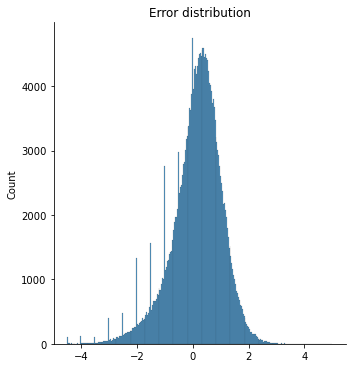

In [64]:
sns.displot(error)
plt.title("Error distribution")

Text(0.5, 1.0, 'Abs error distribution')

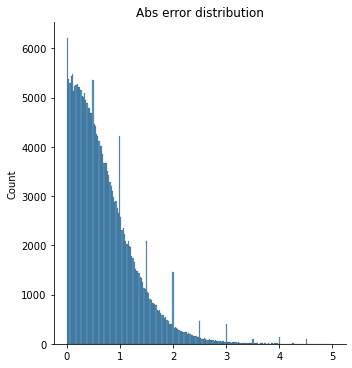

In [67]:
sns.displot(abs_error)
plt.title("Abs error distribution")

In [68]:
{
    "Mean absolute error" : np.mean(abs_error),
    "Median absolute error": np.median(abs_error),
    "0.9 Quantile absolute error": np.quantile(abs_error, 0.9)
}

{'Mean absolute error': 0.7114945111778948,
 'Median absolute error': 0.5770899197462833,
 '0.9 Quantile absolute error': 1.4921992724317463}

## Results

* The final model had 
    * 0.9 RMSE (root mean squared error), 
    * 0.7 MAE (mean absolute error), 
    * 0.57 MAD (median absolute deviation)
    * 90% of the absolute errors are less than 1.5